<a href="https://colab.research.google.com/github/Pathakarnav22/Machine-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip! install tensorflow


ERROR: unknown command "!"


In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

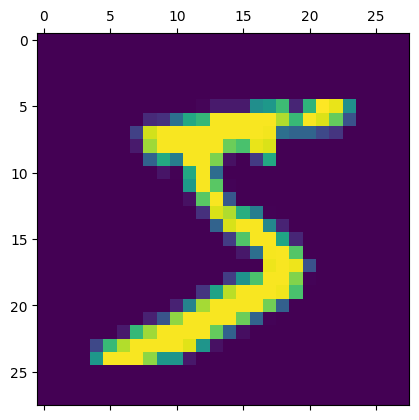

In [8]:
plt.matshow(X_train[0])

In [6]:
y_train[2]

np.uint8(4)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8153 - loss: 0.7205
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9115 - loss: 0.3167
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9210 - loss: 0.2845
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0.2733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9253 - loss: 0.2629


In [13]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9123 - loss: 0.3044


[0.26653510332107544, 0.9258000254631042]

In [14]:
model.predict(X_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.2872833e-02, 3.3545558e-07, 8.1363112e-02, ..., 9.9976003e-01,
        9.5339149e-02, 6.9273740e-01],
       [3.6402705e-01, 6.5288721e-03, 9.9963915e-01, ..., 9.9274386e-13,
        1.5440273e-01, 2.9937026e-09],
       [4.6848418e-04, 9.9382615e-01, 7.0580018e-01, ..., 1.7378491e-01,
        3.6432791e-01, 4.4915602e-02],
       ...,
       [5.8275059e-06, 3.8063972e-06, 2.0838662e-03, ..., 2.7658308e-01,
        5.9537941e-01, 7.8582639e-01],
       [1.6833495e-04, 2.2658751e-04, 2.6967912e-04, ..., 4.6529243e-05,
        7.4882299e-01, 1.3605012e-04],
       [1.4265966e-02, 3.7378647e-10, 2.6968929e-01, ..., 2.0553365e-08,
        2.0570727e-04, 4.1956756e-07]], dtype=float32)

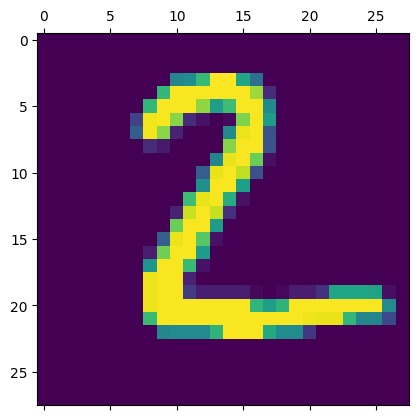

In [15]:
plt.matshow(X_test[1])

In [16]:
y_predicted = model.predict(X_test_flatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.6402705e-01, 6.5288721e-03, 9.9963915e-01, 3.8317949e-01,
       6.9578693e-10, 8.6684996e-01, 8.5912532e-01, 9.9274386e-13,
       1.5440273e-01, 2.9937026e-09], dtype=float32)

In [17]:
np.argmax(y_predicted[1])

np.int64(2)

In [19]:
y_predict_labels = [np.argmax(i) for i in y_predicted]
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm
#

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [   7,    8,  948,   10,    8,    3,   10,   10,   23,    5],
       [   3,    0,   30,  911,    0,   26,    1,   11,   20,    8],
       [   2,    1,    9,    1,  907,    0,    8,    4,   10,   40],
       [  11,    3,    8,   26,    8,  784,    8,    7,   30,    7],
       [  15,    3,   13,    1,    8,   20,  892,    2,    4,    0],
       [   1,    5,   26,    3,    6,    1,    0,  943,    3,   40],
       [   8,    8,    9,   21,    9,   25,    7,   11,  869,    7],
       [  11,    7,    1,   10,   23,    6,    0,   20,    6,  925]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

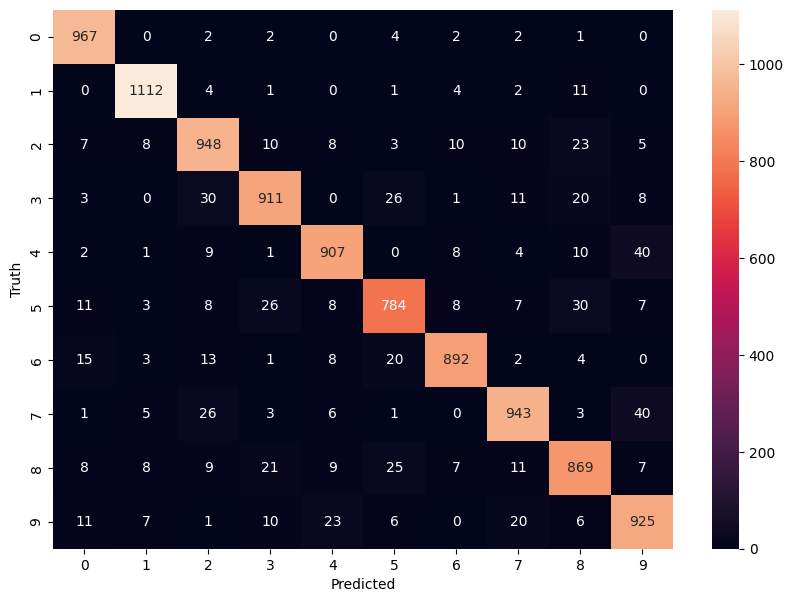

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')